In [1]:
import pandas
from sklearn.svm import *
from sklearn.preprocessing import *

In [2]:
data = pandas.read_csv('train.csv')

In [3]:
data.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A670013,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [4]:
import datetime
date_list = [ datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in data['DateTime'] ]
data['date'] = [x.date().isoformat() for x in date_list]
data['year'] = [x.date().year for x in date_list]
data['month'] = [x.date().month for x in date_list]
data['week'] = [x.date().isoweekday() for x in date_list]
data['time'] = [x.time().isoformat() for x in date_list]
del date_list

In [5]:
%matplotlib inline
#breed 频次 > 10的数据占90%，可以只取这部分one-hot
breeds = data.Breed.value_counts()
print(breeds[breeds > 10].count())

181


In [6]:
data.groupby('OutcomeType').SexuponOutcome.describe()

OutcomeType            
Adoption         count             10769
                 unique                4
                 top       Neutered Male
                 freq               5222
Died             count               197
                 unique                5
                 top         Intact Male
                 freq                 79
Euthanasia       count              1555
                 unique                5
                 top         Intact Male
                 freq                477
Return_to_owner  count              4785
                 unique                5
                 top       Neutered Male
                 freq               2247
Transfer         count              9422
                 unique                5
                 top       Intact Female
                 freq               2550
dtype: object

In [7]:
data.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [8]:
data.groupby('OutcomeType').AgeuponOutcome.describe()

OutcomeType            
Adoption         count        10769
                 unique          28
                 top       2 months
                 freq          2636
Died             count          197
                 unique          31
                 top        1 month
                 freq            48
Euthanasia       count         1553
                 unique          39
                 top        2 years
                 freq           275
Return_to_owner  count         4786
                 unique          35
                 top        2 years
                 freq           917
Transfer         count         9406
                 unique          41
                 top         1 year
                 freq          1417
dtype: object

In [9]:
data.groupby('OutcomeType').AgeuponOutcome.describe()

OutcomeType            
Adoption         count        10769
                 unique          28
                 top       2 months
                 freq          2636
Died             count          197
                 unique          31
                 top        1 month
                 freq            48
Euthanasia       count         1553
                 unique          39
                 top        2 years
                 freq           275
Return_to_owner  count         4786
                 unique          35
                 top        2 years
                 freq           917
Transfer         count         9406
                 unique          41
                 top         1 year
                 freq          1417
dtype: object

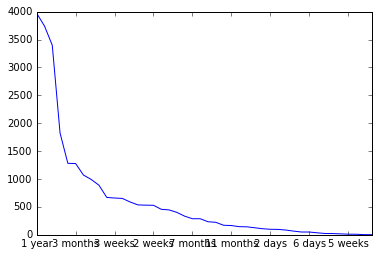

In [10]:
data.AgeuponOutcome.value_counts().plot()

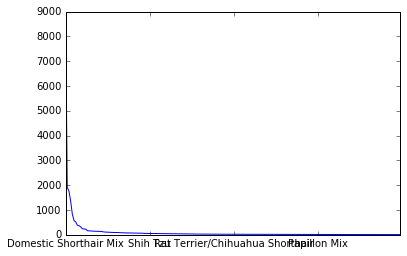

In [11]:
data.Breed.value_counts().head(200).plot()

In [12]:
data['is_mix'] = data.Breed.apply(lambda x: int(x.find('Mix') > 0))

In [13]:
data['color_mix'] = data.Color.apply(lambda x: int(x.find('/')))

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder

mlb = MultiLabelBinarizer()
le = LabelEncoder()
train_data = pandas.DataFrame()

def gen_feature():
    train_data['OutcomeType'] = le.fit_transform(data['OutcomeType'])
    train_data['AnimalType'] = le.fit_transform(data['AnimalType'])
    #众数填充
    data['SexuponOutcome'].fillna(inplace = True, value = data['SexuponOutcome'].describe().top)
    date_list = [ datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S") for x in data['DateTime'] ]
    train_data['year'] = [x.date().year for x in date_list]
    train_data['week'] = data['week']
    train_data['month'] = [x.date().month for x in date_list]
    train_data['day'] = [x.date().day for x in date_list]
    sex_cat = mlb.fit_transform([[x] for x in data['SexuponOutcome']])
    for i, val in zip(mlb.classes_, sex_cat.T):
        train_data['SexuponOutcome_' + i] = val
    del sex_cat
    train_data['Breed'] = le.fit_transform(data['Breed'])
    train_data['is_breed_mix'] = data.Breed.apply(lambda x: int(x.find('Mix') > 0))
    train_data['is_color_mix'] = data.Color.apply(lambda x: int(x.find('/') > 0))

In [15]:
gen_feature()

OutcomeType  year
0            2013    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2014    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2015    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2016    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
1            2013    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2014    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2015    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2016    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
2            2013    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2014    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2015    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2016    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
3            2013    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
             2014    [[Axes(0.125,0.125;0.336957x0.775), Ax

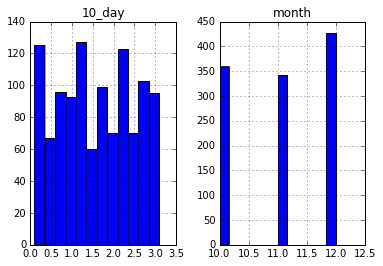

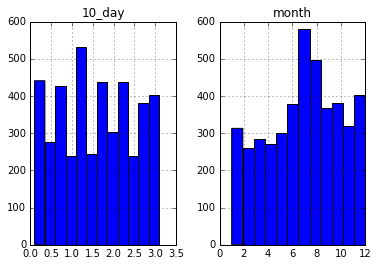

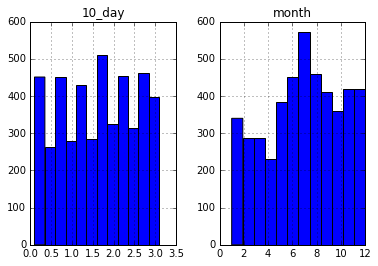

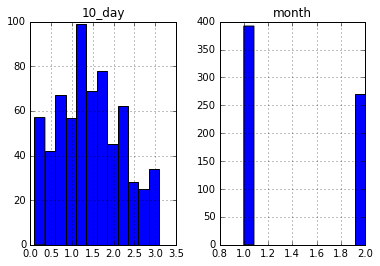

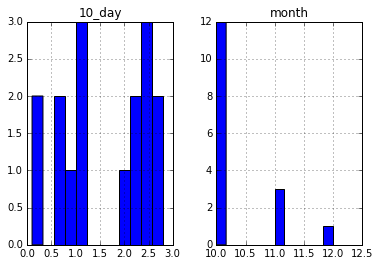

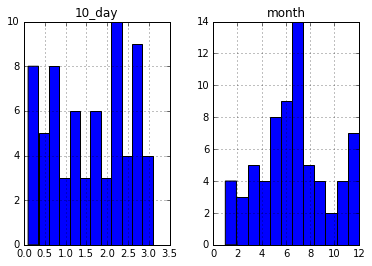

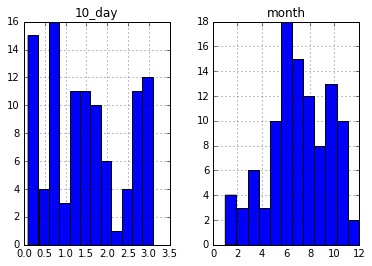

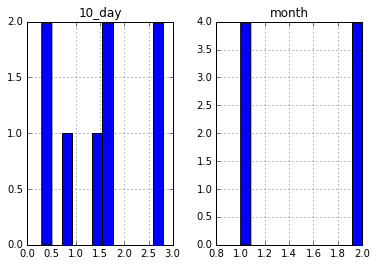

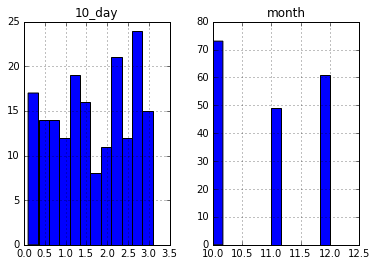

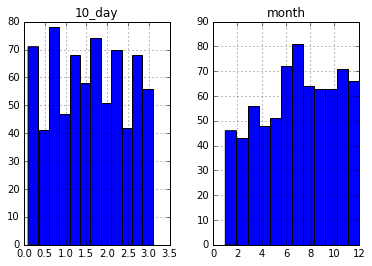

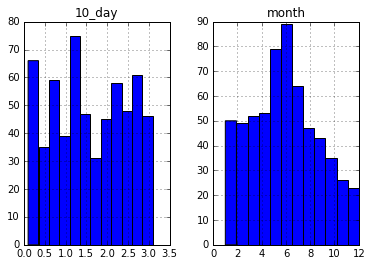

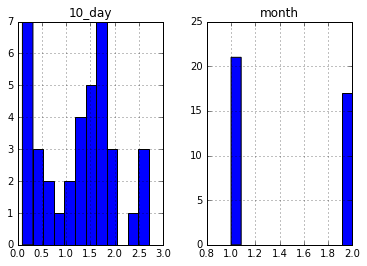

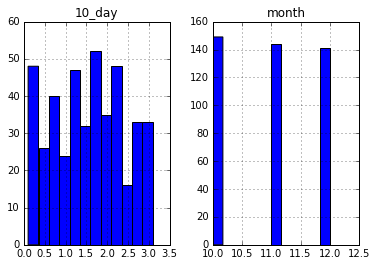

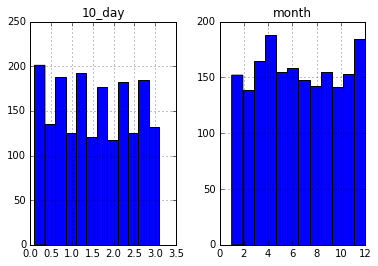

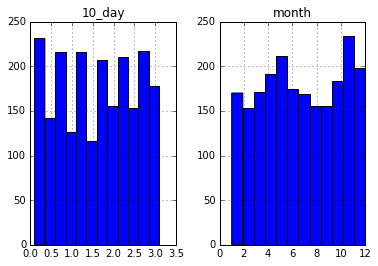

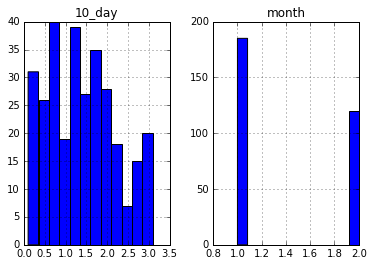

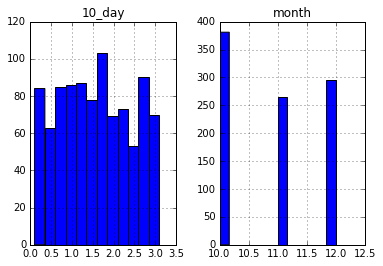

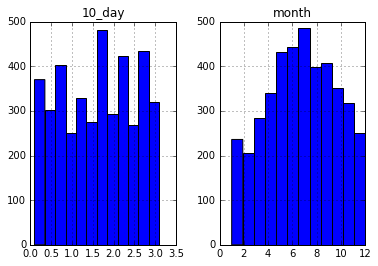

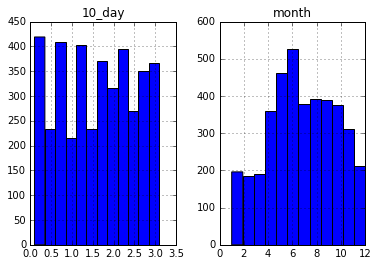

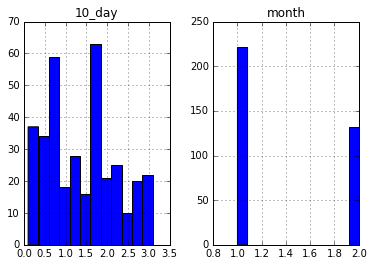

In [16]:
aaa = pandas.DataFrame()
aaa['month'] = train_data['month']
aaa['year'] = train_data['year']
aaa['OutcomeType'] = train_data['OutcomeType']
aaa['10_day'] = train_data['day'] / 10
aaa.groupby(['OutcomeType', 'year']).hist(bins=12)

OutcomeType
0    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
1    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
2    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
3    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
4    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

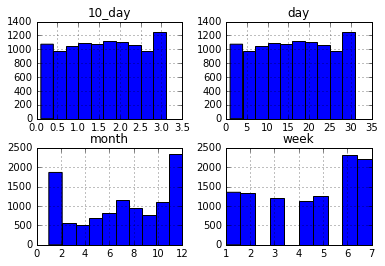

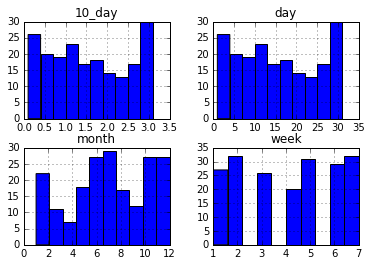

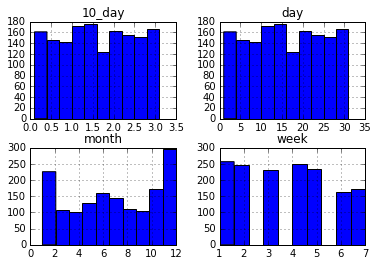

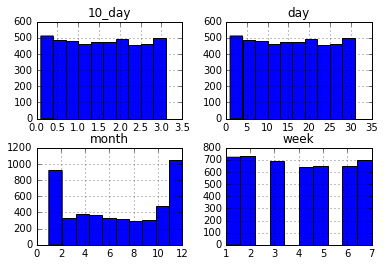

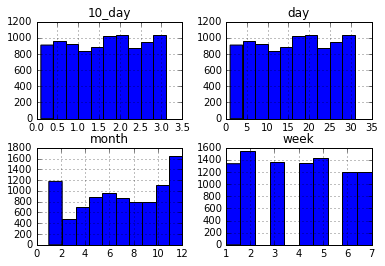

In [31]:
%matplotlib inline
try:
    del aaa['year']
except:
    pass
aaa['day'] = train_data['day']
aaa['week'] = train_data['week']
aaa.groupby('OutcomeType').hist()


In [27]:
bbb = train_data[train_data.OutcomeType==4]

In [29]:
bbb.columns

Index(['OutcomeType', 'AnimalType', 'year', 'week', 'month', 'day',
       'SexuponOutcome_Intact Female', 'SexuponOutcome_Intact Male',
       'SexuponOutcome_Neutered Male', 'SexuponOutcome_Spayed Female',
       'SexuponOutcome_Unknown', 'Breed', 'is_breed_mix', 'is_color_mix'],
      dtype='object')

In [ ]:
def is_holiday(x):
    if (x.month == )